In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

In [2]:
import warnings
warnings.filterwarnings('ignore')

import scipy.stats
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [3]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston_df=pd.read_csv(boston_url)
boston_df.head()


,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


[Text(0,0.5,"Median value of owner-occupied homes in $1000's"),
 Text(0.5,0,'Boxplot'),
 Text(0.5,1,'Boxplot for Median value of owner-occupied homes')]

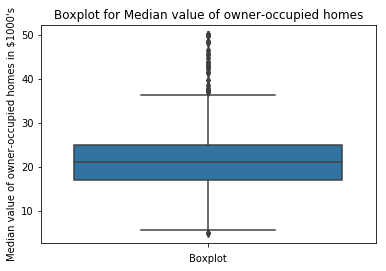

In [4]:
box = sns.boxplot(y = 'MEDV', data = boston_df)
box.set(ylabel = "Median value of owner-occupied homes in $1000's"
        , xlabel = "Boxplot"
        , title = "Boxplot for Median value of owner-occupied homes")

In [ ]:
#EXPLANATION - The Boxplot shown here corresponds to Median value of owner-occupied homes in $1000's and we can see that there are various outliers below the first quartile. The Median as per the BoxPlot is shown in the plot as approximately 21 or 22

[Text(0,0.5,"Median value of owner-occupied homes in $1000's"),
 Text(0.5,0,'Proportion of owner-occupied units built prior to 1940'),
 Text(0.5,1,'Boxplot for the MEDV variable vs the AGE variable.')]

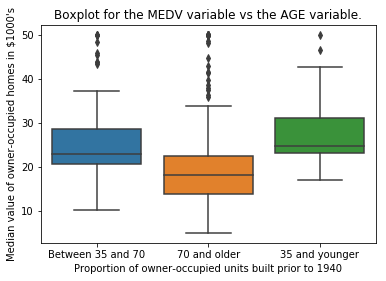

In [8]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

boxplot = sns.boxplot(x = 'Age_Group', y = 'MEDV', data = boston_df)
boxplot.set(xlabel = "Proportion of owner-occupied units built prior to 1940"
           , ylabel = "Median value of owner-occupied homes in $1000's"
           , title = "Boxplot for the MEDV variable vs the AGE variable.")

In [13]:
#EXPLANATION - The Boxplot corresponds to the various groups in the AGE column and there are three groups which are 35 years and younger, Between 35 and 70 years and 70 years and older. The Median for the group "35 years and younger" is approximately 25, for "70 years and older" the Median is approximately 19 and for "Between 35 and 70 years" group the Median is approximately 22


[Text(0,0.5,'Frequency for Charles river variable'),
 Text(0.5,0,'Charles River dummy variable (1 if tract bounds river; 0 otherwise)'),
 Text(0.5,1,'Histogram for the Charles river variable')]

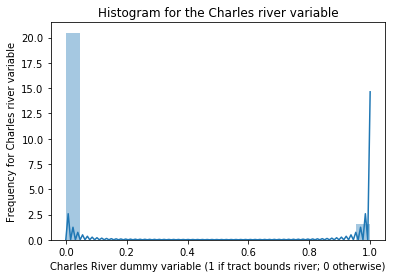

In [12]:
distplot = sns.distplot(boston_df['CHAS'])
distplot.set(xlabel = "Charles River dummy variable (1 if tract bounds river; 0 otherwise)"
             ,ylabel = "Frequency for Charles river variable"
            , title = "Histogram for the Charles river variable")

In [ ]:
#EXPLANATION - The Histogram shows the Frequency Distribution for Charles River dummy variable where (1 if tract bounds river; 0 otherwise)



[Text(0,0.5,'Nitric Oxides concentration (parts per 10 million)'),
 Text(0.5,0,'Proportion of non-retail business acres per town.'),
 Text(0.5,1,'Scatter Plot between NOX and INDUS')]

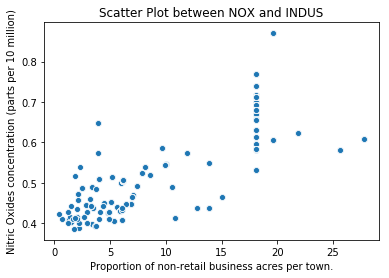

In [14]:
scatter = sns.scatterplot(x = 'INDUS', y = 'NOX', data = boston_df)
scatter.set(ylabel = "Nitric Oxides concentration (parts per 10 million)"
            , xlabel = "Proportion of non-retail business acres per town."
           , title = "Scatter Plot between NOX and INDUS")

In [ ]:
#EXPLANATION - The Scatter Plot shows that there is a high correlation or positive correlation between the Nitric Oxides concentration (parts per 10 million) and Proportion of non-retail business acres per town as there is a near linear relationship between both of them.



[Text(0,0.5,'Frequency of Pupil-Teacher ratio by town'),
 Text(0.5,0,'Pupil-Teacher ratio by town'),
 Text(0.5,1,'Histogram for the pupil to teacher ratio variable')]

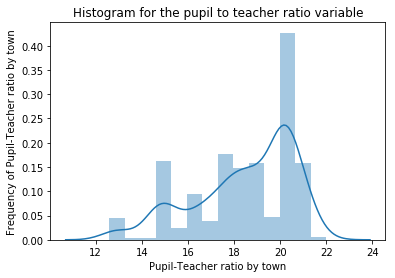

In [15]:
histplot = sns.distplot(boston_df['PTRATIO'])
histplot.set(xlabel = "Pupil-Teacher ratio by town"
             , ylabel = "Frequency of Pupil-Teacher ratio by town"
            , title = "Histogram for the pupil to teacher ratio variable")

In [ ]:
#EXPLANTION - The Histogram mentioned above corresponds to the Frequency Distribution of Pupil-Teacher ratio by town. The highest corresponds to the 20 - 22 bin group. We can also see that the distribution is skewed to the left as the tail of the histogram is towards the 12 on the x-axis. This is called as the Negative-skewed Distribution.



In [16]:
scipy.stats.levene(boston_df['MEDV'], boston_df['CHAS'], center = 'mean')

LeveneResult(statistic=532.6811164157676, pvalue=5.40253511973145e-95)

In [17]:
scipy.stats.ttest_ind(boston_df['MEDV'], boston_df['CHAS'])

Ttest_indResult(statistic=54.9210289745203, pvalue=1.4651540072350996e-305)

In [ ]:
#CONCLUSION: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in in median value of houses bounded by the Charles river



In [18]:
boston_df.loc[boston_df['AGE'] <= 30, 'Age_Group'] = "35 and younger"
boston_df.loc[(boston_df['AGE'] > 30) & (boston_df['AGE'] < 70), 'Age_Group'] = "Between 35 and 70"
boston_df.loc[(boston_df['AGE'] >= 70), 'Age_Group'] = "70 and older"

In [19]:
scipy.stats.levene(boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV'],
                   boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV'], 
                   boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV'], 
                   center='mean')

LeveneResult(statistic=1.9263167703439688, pvalue=0.14675700390882251)

In [20]:
thirtyfive_lower = boston_df[boston_df['Age_Group'] == "35 and younger"]['MEDV']
thirtyfive_seventy = boston_df[boston_df['Age_Group'] == "Between 35 and 70"]['MEDV']
seventy_older = boston_df[boston_df['Age_Group'] == "70 and older"]['MEDV']

In [21]:
scipy.stats.f_oneway(thirtyfive_lower, thirtyfive_seventy, seventy_older)

F_onewayResult(statistic=34.249179272635395, pvalue=1.135217093487225e-14)

In [ ]:
#CONCLUSION: Since the p-value is less than alpha value 0.05, we reject the null hypothesis as there is enough proof that there is a statistical difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).



In [22]:
scipy.stats.pearsonr(boston_df['INDUS'], boston_df['NOX'])

(0.763651446920915, 7.913361061242082e-98)

In [ ]:
#CONCLUSION: Since the p-value is less than 0.05, we reject the Null hypothesis and conclude that there exists a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.



In [23]:
X = boston_df['DIS']
y = boston_df['MEDV']
X = sm.add_constant(X) 
model = sm.OLS(y, X).fit()
predictions = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 21 Jan 2023   Prob (F-statistic):           1.21e-08
Time:                        23:03:10   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#CONCLUSION: Like the t-test, the p-value is less than the alpha (α) level = 0.05, so we reject the null hypothesis as there is evidence that there is impact of an additional weighted distance to the five Boston employment centres on the median value of owner occupied homes. The coefficient is positive 0.0572 which also signifies that the impact increases by 0.0572 when there is an additional weighted distance to the five Boston employment centres .

